In [ ]:
import pandas as pd
import requests
r = requests.get("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")
data = r.json()

In [ ]:
data

{'id': 1371,
 'url': 'https://www.tvmaze.com/shows/1371/westworld',
 'name': 'Westworld',
 'type': 'Scripted',
 'language': 'English',
 'genres': ['Drama', 'Science-Fiction', 'Western'],
 'status': 'Ended',
 'runtime': 60,
 'averageRuntime': 63,
 'premiered': '2016-10-02',
 'ended': '2022-08-14',
 'officialSite': 'http://www.hbo.com/westworld',
 'schedule': {'time': '21:00', 'days': ['Sunday']},
 'rating': {'average': 8.2},
 'weight': 99,
 'network': {'id': 8,
  'name': 'HBO',
  'country': {'name': 'United States',
   'code': 'US',
   'timezone': 'America/New_York'},
  'officialSite': 'https://www.hbo.com/'},
 'webChannel': None,
 'dvdCountry': None,
 'externals': {'tvrage': 37537, 'thetvdb': 296762, 'imdb': 'tt0475784'},
 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/445/1113927.jpg',
  'original': 'https://static.tvmaze.com/uploads/images/original_untouched/445/1113927.jpg'},
 'summary': '<p><b>Westworld</b> is a dark odyssey about the dawn of artifici

In [ ]:
df = pd.DataFrame.from_records(data['_embedded']['episodes'])

In [ ]:
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While Dolores joins William and Logan on th...,{'self': {'href': 'https://api.tvmaze.com/epis...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...


In [ ]:
df.dtypes

id           int64
url         object
name        object
season       int64
number       int64
type        object
airdate     object
airtime     object
airstamp    object
runtime      int64
rating      object
image       object
summary     object
_links      object
dtype: object

In [ ]:
df['airdate'] = pd.to_datetime(df['airdate'].astype(str),errors = 'coerce')

In [ ]:
df['airtime'] = pd.to_datetime(df['airtime'],format= '%H:%M')

In [ ]:
df['airtime'] = df['airtime'].dt.strftime('%I:%M %p')

In [ ]:
df['rating'] = [d.get('average') for d in df.rating]

In [ ]:
df['medium_image_link'] = [d.get('medium') for d in df.image]

In [ ]:
df['original_image_link'] = [d.get('original') for d in df.image]

In [ ]:
df['summary'] = df['summary'].str.replace(r'<[^<>]*>', '', regex=True)

In [ ]:
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,2016-10-03T01:00:00+00:00,68,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,A woman named Dolores is a free spirit in the ...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,2016-10-10T01:00:00+00:00,60,7.7,{'medium': 'https://static.tvmaze.com/uploads/...,Bernard suspects that someone is sabotaging th...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,2016-10-17T01:00:00+00:00,60,7.6,{'medium': 'https://static.tvmaze.com/uploads/...,Bernard continues to investigate Dolores' supp...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,2016-10-24T01:00:00+00:00,60,7.9,{'medium': 'https://static.tvmaze.com/uploads/...,While Dolores joins William and Logan on their...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,2016-10-31T01:00:00+00:00,60,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,Dolores takes the first step on her path of di...,{'self': {'href': 'https://api.tvmaze.com/epis...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [ ]:
df.dtypes

id                              int64
url                            object
name                           object
season                          int64
number                          int64
type                           object
airdate                datetime64[ns]
airtime                        object
airstamp                       object
runtime                         int64
rating                        float64
image                          object
summary                        object
_links                         object
medium_image_link              object
original_image_link            object
dtype: object

In [ ]:
df['rating'][df['season']==1].mean()

8.09

<Axes: xlabel='season'>

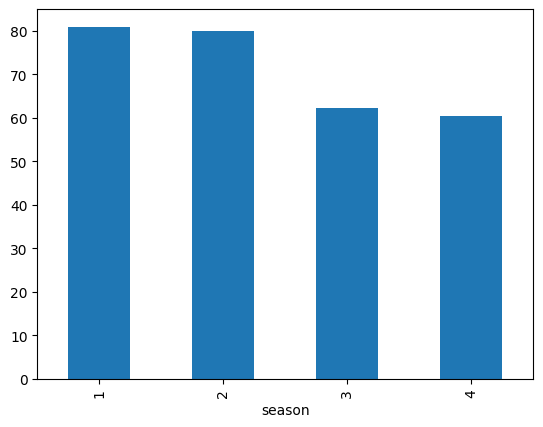

In [ ]:
df.groupby(by="season")["rating"].sum().plot(kind='bar')

In [ ]:
df['name'][df['rating']>8]

6                 Trompe L'Oeil
8     The Well-Tempered Clavier
9            The Bicameral Mind
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

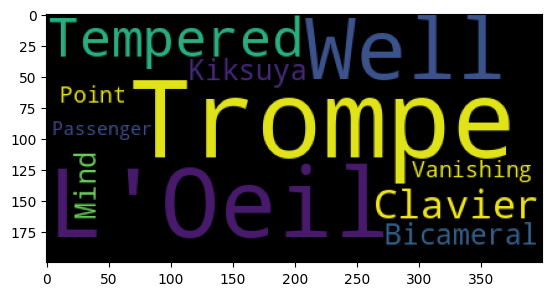

In [ ]:
wc = WordCloud().generate(' '.join(df['name'][df['rating']>8]))
plt.imshow(wc)

In [ ]:
df['name'][df['airdate'] < "2019-05-01"]

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

In [ ]:
df.columns

Index(['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
       'airstamp', 'runtime', 'rating', 'image', 'summary', '_links',
       'medium_image_link', 'original_image_link'],
      dtype='object')

In [ ]:
df['episode_rank_by_rating_desc'] = df.groupby('season')['rating'].rank(method='dense',ascending=False)
df['episode_rank_by_rating_asc'] = df.groupby('season')['rating'].rank(method='dense')

In [ ]:
#episodes with highest rating per season
df[['name','season','rating']][df['episode_rank_by_rating_desc']==1]

,name,season,rating
9,The Bicameral Mind,1,8.7
17,Kiksuya,2,8.7
20,Parce Domine,3,8.0
23,The Mother of Exiles,3,8.0
32,Zhuangzi,4,7.8


In [ ]:
#episodes with lowest rating per season
df[['name','season','rating']][df['episode_rank_by_rating_asc']==1]

,name,season,rating
2,The Stray,1,7.6
14,Akane No Mai,2,7.6
25,Decoherence,3,7.5
26,Passed Pawn,3,7.5
28,The Auguries,4,7.1


In [ ]:
#summaries of highest rated episodes per season
df[['summary','season']][df['episode_rank_by_rating_desc']==1]

,summary,season
9,Delores finds out the truth about William's fa...,1
17,Another of Westworld's Host revolutionaries is...,2
20,"If you're stuck in a loop, try walking in a st...",3
23,The truth doesn't always set you free.,3
32,God is bored.,4
